In [261]:
XLIM = 20000

# Loading csv

In [175]:
def load(filename):
    lst = []
    with open(filename) as f:
        for i, line in enumerate(f.readlines()):
            if i > 0:
                line = line.split(",")
                if int(line[4]) > XLIM:
                    break
                step, reward = line[4], line[2]
                step = int(step)
                reward = float(reward)
                lst += [(step, reward)]
    return lst

In [176]:
import pdb

In [310]:
def loadWandB(filename):
    """
    for CACC, when length is needed to rescale reward
    """
    lst = []
    tmp = 0
    tmp = filename.split(".")
    filename1 = tmp[0]+"_len."+tmp[1]
    with open(filename1) as f1:
        lengths = f1.readlines()
        with open(filename) as f:
            for i, line in enumerate(f.readlines()):
                if i > 0:
                    line = line.split(",")
                    step, reward = line[0][1:-1], line[1][1:-1]
                    step = int(step)
                    if step > XLIM:
                        break
                    reward = float(reward)
                    if reward == tmp:
                        continue
                    tmp = reward
                    if 'SAC' in filename or 'MBPO' in filename:
                        length = int(lengths[i].split(",")[1][1:-1])
                        reward = reward*2000 - 200*length
                        reward = reward*8/length
                    lst += [(step, reward)]
    return lst

In [216]:
def loadWandB(filename):
    lst = []
    tmp=0
    with open(filename) as f:
        for i, line in enumerate(f.readlines()):
            if i > 0:
                line = line.split(",")
                step, reward = line[0][1:-1], line[1][1:-1]
                step = int(step)
                if step > XLIM:
                    break
                reward = float(reward)
                if reward == tmp:
                    continue
                tmp = reward
                lst += [(step, reward)]
    return lst

In [178]:
def rolling_window(a, window):
    # same padded, roll over the last dim
    # window size should be odd for symetry
    padding = [[0, 0]]* len(a.shape)
    padding[-1] = [(window-1)//2, (window-1)//2]
    a = np.pad(a, padding, mode='edge')
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

# Plotting

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

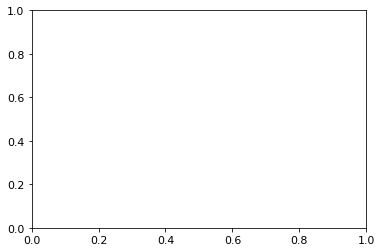

In [295]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


(array([-3000., -2500., -2000., -1500., -1000.,  -500.,     0.]),
 <a list of 7 Text yticklabel objects>)

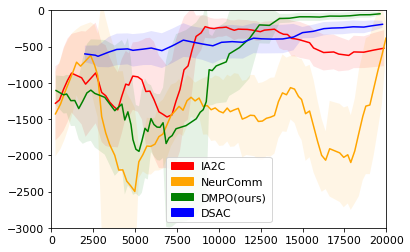

In [312]:
fig, ax = plt.subplots()
handles = []
for config in [("red", "CU_IA2C_2000.csv", "IA2C"), 
              ("orange", "CU_NeurComm_2000.csv", "NeurComm"),
              ('green', "MBPO_catchup.csv", "DMPO(ours)"),
              ("blue", "SAC_catchup.csv", "DSAC")]:
    color, filename, label = config
    if '2000' in filename:
        lst = load(filename)
    else:
        lst = loadWandB(filename)
    x, y = [item[0] for item in lst], [item[1] for item in lst]
    y = np.array(y)
    y = rolling_window(y, 9)
    y_mean = y.mean(axis=1)
    y_std = y.std(axis=1)
    line = ax.plot(x, y_mean, color=color)
    legend = mpatches.Patch(color=color, label=label)
    handles += [legend]
    ax.fill_between(x, y_mean-y_std, y_mean+y_std, facecolor=color, edgecolor='none', alpha=0.1)
ax.legend(handles=handles, fontsize=11)
ax.set_ylim((-3000, 0))
ax.set_xlim((0, XLIM))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


In [306]:
fig.get_figheight()

4.0

In [307]:
fig.get_figwidth()

6.0

In [313]:
fig.savefig("catchup.pdf")

(0, 20000)

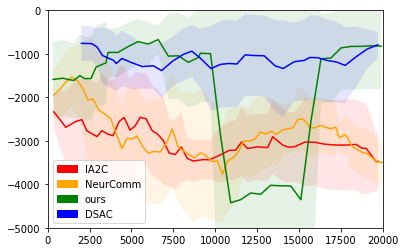

In [205]:
fig, ax = plt.subplots(1, 1)
handles = []
for config in [("red", "SD_IA2C_2000.csv", "IA2C"), 
              ("orange", "SD_NeurComm_2000.csv", "NeurComm"),
              ('green', "MBPO_slowdown.csv", "ours"),
              ("blue", "SAC_slowdown.csv", "DSAC")]:
    color, filename, label = config
    if '2000' in filename:
        lst = load(filename)
    else:
        lst = loadWandB(filename)
    x, y = [item[0] for item in lst], [item[1] for item in lst]
    y = np.array(y)
    y = rolling_window(y, 9)
    y_mean = y.mean(axis=1)
    y_std = y.std(axis=1)
    line = ax.plot(x, y_mean, color=color)
    legend = mpatches.Patch(color=color, label=label)
    handles += [legend]
    ax.fill_between(x, y_mean-y_std, y_mean+y_std, facecolor=color, edgecolor='none', alpha=0.1)
ax.legend(handles=handles)
ax.set_ylim((-5000, 0))
ax.set_xlim((0, XLIM))


In [206]:
fig.savefig("slowdown.pdf")

In [207]:
x  = [-157.8665735324224,-135.86541612943014,-192.891274591287,-184.52868461608887,-170.06491988897324,-231.99269771575928,-135.80788254737854,-189.15927509466806,-203.01530361175537,-117.4400806427002]

In [211]:
np.mean(x)

-358.65980786085123

In [212]:
np.std(x)

222.85325783979428

In [210]:
x = [-368.4605544805527,-319.7408809264501,-828.9189287026724,-151.3703707853953,-530.2833665410677,-188.30244302749634,-317.81268914540607,-616.3406178355217,-166.1375359694163,-99.2306911945343]

(0, 20000)

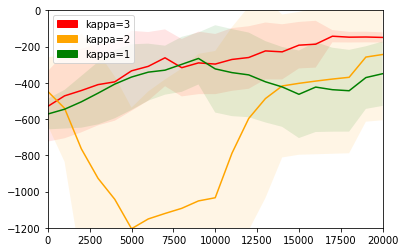

In [265]:
fig, ax = plt.subplots(1, 1)
handles = []
for config in [("red", "r3.csv", "kappa=3"), 
              ("orange", "r2.csv", "kappa=2"),
              ('green', "r1.csv", "kappa=1")]:
    color, filename, label = config
    lst = loadWandB(filename)
    x, y = [item[0] for item in lst], [item[1] for item in lst]
    y = np.array(y)
    y = rolling_window(y, 9)
    y_mean = y.mean(axis=1)
    y_std = y.std(axis=1)
    line = ax.plot(x, y_mean, color=color)
    legend = mpatches.Patch(color=color, label=label)
    handles += [legend]
    ax.fill_between(x, y_mean-y_std, y_mean+y_std, facecolor=color, edgecolor='none', alpha=0.1)
ax.legend(handles=handles)
ax.set_ylim((-1200, 0))
ax.set_xlim((0, XLIM))

In [222]:
fig.savefig("kappa.pdf")

In [223]:
x = [-930.413947502772,-1548.7968342644829,-1522.670292523172,-145.19409457842508,-176.19744499524435,-1323.9323553111817,-562.1264638503393,-1111.3673425383038,-565.1307064294815,-1447.5059957967865]
x +=[-1394.665652513504,-2089.819177405702,-1046.4488076666992,-2758.998324473699,-2206.1039393146834,-2102.05361213949,-2063.8383991188475,-2087.6529468430413,-2086.5801046291986,-2674.5970951186287]
x +=[-286.88804666201275,-222.2229472796122,-960.3005392725269,-1300.140925894181,-1394.9731161693733,-377.53315051396686,-451.9828458627065,-276.95929805437726,-944.1963329290351,-307.99454768498737]
x +=[-812.5264574897786,-1347.324668793451,-232.53666241963705,-190.64226508140564,-290.38065274556476,-240.61718066533408,-189.99920090039572,-478.8324296474457,-217.78448104858398,-485.81866959730786]
x +=[-492.6011162996292,-461.34176472822827,-1025.4539390653372,-749.9694007635117,-269.0096580982208,-1341.202427148819,-160.1797084013621,-417.6885990301768,-144.92738763491312,-582.8194226821264]

## State Error

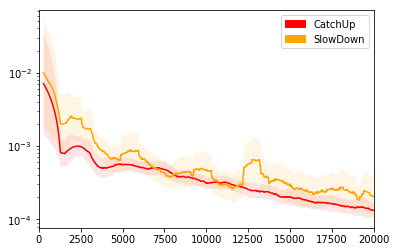

In [285]:
fig, ax = plt.subplots(1, 1)
handles = []
for config in [("red", "state_cu.csv", "CatchUp"), 
              ("orange", "state_sd.csv", "SlowDown")]:
    color, filename, label = config
    lst = loadWandB(filename)
    x, y = [item[0] for item in lst], [item[1] for item in lst]
    y = np.array(y)
    y = rolling_window(y, 101)
    y_mean = y.mean(axis=1)
    y_std = np.log(y).std(axis=1)
    y_std = np.exp(y_std)
    line = ax.plot(x, y_mean, color=color)
    ax.fill_between(x, y_mean/y_std, y_mean*y_std, facecolor=color, edgecolor='none', alpha=0.1)
    legend = mpatches.Patch(color=color, label=label)
    handles += [legend]
  #  ax.fill_between(x, y_mean-y_std, y_mean+y_std, facecolor=color, edgecolor='none', alpha=0.1)
ax.legend(handles=handles)
#ax.set_ylim((-1200, 0))
ax.set_xlim((0, XLIM))
ax.set_yscale("log")

In [286]:
fig.savefig("state_error.pdf")

## Reward Error

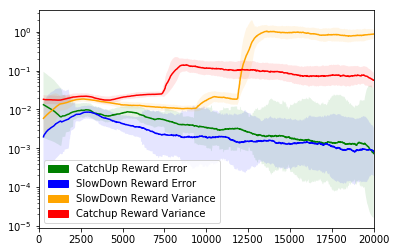

In [283]:
fig, ax = plt.subplots(1, 1)
handles = []
for config in [("green", "reward_cu.csv", "CatchUp Reward Error"), 
              ("blue", "reward_sd.csv", "SlowDown Reward Error"),
              ("orange", "var_sd.csv", "SlowDown Reward Variance"),
              ("red", "var_cu.csv", "Catchup Reward Variance")]:
    color, filename, label = config
    lst = loadWandB(filename)
    x, y = [item[0] for item in lst], [item[1] for item in lst]
    y = np.array(y)
    y = rolling_window(y, 101)
    y_mean = y.mean(axis=1)
    y_std = np.log(y).std(axis=1)
    y_std = np.exp(y_std)
    line = ax.plot(x, y_mean, color=color)
    legend = mpatches.Patch(color=color, label=label)
    handles += [legend]
    ax.fill_between(x, y_mean/y_std, y_mean*y_std, facecolor=color, edgecolor='none', alpha=0.1)
ax.legend(handles=handles)
#ax.set_ylim((-1200, 0))
ax.set_xlim((0, XLIM))
ax.set_yscale("log")

In [284]:
fig.savefig("reward_error.pdf")

In [ ]:
mbpo slowdown -929.9788275915539 pm 726.6257023153313
mbpo catchup -407.39330544140614 pm 509.51170474199165

In [244]:
x=[[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198],[-110.27693192164104,-133.7716535727183,-171.42879605293274,-637.0246057709059,-307.53190139929455,-500.8816625364125,-97.3899753888448,-89.69239195187886,-96.39869689941406,-204.99748667081198]]

In [227]:
x = a[0]+b[0]+c[0]+d[0]+e[0]

In [245]:
x=x[0]

In [246]:
len(x)

10

In [235]:
x= [[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237],[-662.7956000963846,-734.073229432106,-420.41337351004285,-176.3679281870524,-144.69667275746664,-109.31411067644756,-184.74444150924683,-226.0857391357422,-769.5280518134435,-161.1226737499237]]

In [236]:
x= x[0]

In [1]:
import numpy as np

In [ ]:
np.clip()